#Sumário

---
Versão 3 - Resultados aceitáveis

Versão 4 - Assets relacionados

Versão 5 - Metrics

Versão 6 - Furrier transform

Versão 7 - ARIMA

Versão 8 - XGBRegressor/Feature Engineering


In [24]:
import pandas as pd
df = pd.read_csv("/content/BOVA11.csv")

PETR3 = pd.read_csv("/content/PETR3.csv")
PETR4 = pd.read_csv("/content/PETR4.csv")
VALE3 = pd.read_csv("/content/VALE3.csv")
ITUB3 = pd.read_csv("/content/ITUB3.csv")
ITUB4 = pd.read_csv("/content/ITUB4.csv")
BBDC3 = pd.read_csv("/content/BBDC3.csv")
BBDC4 = pd.read_csv("/content/BBDC4.csv")
B3SA3 = pd.read_csv("/content/B3SA3.csv")
ABEV3 = pd.read_csv("/content/ABEV3.csv")
PETR3 = PETR3.drop(columns=['Unnamed: 0'])
PETR4 = PETR4.drop(columns=['Unnamed: 0'])
VALE3 = VALE3.drop(columns=['Unnamed: 0'])
ITUB3 = ITUB3.drop(columns=['Unnamed: 0'])
ITUB4 = ITUB4.drop(columns=['Unnamed: 0'])
BBDC3 = BBDC3.drop(columns=['Unnamed: 0'])
BBDC4 = BBDC4.drop(columns=['Unnamed: 0'])
B3SA3 = B3SA3.drop(columns=['Unnamed: 0'])
ABEV3 = ABEV3.drop(columns=['Unnamed: 0'])
ABEV3

,Close
0,0.520882
1,0.494478
2,0.494478
3,0.494478
4,0.494478
...,...
6353,14.300000
6354,14.510000
6355,14.570000
6356,14.120000


In [25]:
df['PETR3'] = PETR3['Close']
df['PETR4'] = PETR4['Close']
df['VALE3'] = VALE3['Close']
df['ITUB3'] = ITUB3['Close']
df['ITUB4'] = ITUB4['Close']
df['BBDC3'] = BBDC3['Close']
df['BBDC4'] = BBDC4['Close']
df['B3SA3'] = B3SA3['Close']
df['ABEV3'] = ABEV3['Close']


In [26]:
df = df.drop(columns=['Date', 'Adj Close', 'High', 'Low', 'Open', 'Volume'])

In [27]:
df

,Close,PETR3,PETR4,VALE3,ITUB3,ITUB4,BBDC3,BBDC4,B3SA3,ABEV3
0,45.849998,4.593750,5.875,3.500000,2.107369,2.691411,2.013040,22.030840,34.990002,0.520882
1,44.419998,4.335937,5.550,3.416666,2.032106,2.574753,1.866637,21.577751,32.000000,0.494478
2,44.990002,4.394531,5.494,3.416666,2.017053,2.574753,1.930078,21.324188,31.150000,0.494478
3,45.900002,4.359375,5.475,3.416666,1.956842,2.574001,1.959359,21.719082,32.500000,0.494478
4,46.689999,4.394531,5.500,3.541666,2.107369,2.661306,1.993519,22.051622,32.939999,0.494478
...,...,...,...,...,...,...,...,...,...,...
3948,131.649994,9.200000,8.300,16.700001,13.961432,20.165289,11.512953,16.209999,12.290000,18.309999
3949,131.860001,8.700000,7.890,15.400000,13.685950,19.752066,11.461472,16.129999,12.000000,18.860001
3950,131.630005,8.880000,7.850,15.350000,13.509641,19.939392,11.550393,16.270000,11.490000,19.059999
3951,131.850006,9.130000,8.130,15.900000,14.303030,20.231403,12.168162,16.320000,11.860000,19.240000


In [28]:
print(df.columns)

Index(['Close', 'PETR3', 'PETR4', 'VALE3', 'ITUB3', 'ITUB4', 'BBDC3', 'BBDC4',
       'B3SA3', 'ABEV3'],
      dtype='object')


In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,3953.0,78.690104,26.632171,36.450001,55.500000,68.500000,104.239998,133.619995
PETR3,3953.0,19.829875,12.245493,3.914062,8.525000,17.549999,26.605000,62.299999
PETR4,3953.0,17.945515,10.131739,4.375000,8.080000,18.049999,23.799999,52.509998
VALE3,3953.0,27.283558,17.391226,2.833333,10.416666,26.930000,40.959999,72.089996
ITUB3,3953.0,8.596824,4.722580,1.731053,3.221264,9.332635,12.418426,19.243675
ITUB4,3953.0,10.624581,5.254568,1.746106,4.914686,12.042110,14.790345,20.656149
BBDC3,3953.0,6.754378,4.145550,1.227344,2.104542,7.368947,9.473580,15.966812
BBDC4,3953.0,15.957720,4.777657,8.001417,11.877472,14.827170,19.260000,29.609316
B3SA3,3953.0,9.853357,6.067116,2.600000,4.266666,8.686666,13.210000,37.000000
ABEV3,3953.0,6.428630,5.641586,0.468107,1.977979,4.111345,8.795912,19.950001


#Metrics

In [30]:
import pandas as pd
import numpy as np

# Supondo que seu DataFrame se chame df e tenha a coluna 'Close'
# 1. Médias móveis simples
df['ma7'] = df['Close'].rolling(window=7).mean()
df['ma21'] = df['Close'].rolling(window=21).mean()

# 2. Médias móveis exponenciais
df['26ema'] = df['Close'].ewm(span=26, adjust=False).mean()
df['12ema'] = df['Close'].ewm(span=12, adjust=False).mean()
df['ema'] = df['Close'].ewm(span=9, adjust=False).mean()  # ou outro valor se desejar

# 3. MACD
df['MACD'] = df['12ema'] - df['26ema']

# 4. Desvio padrão e bandas de Bollinger
df['20sd'] = df['Close'].rolling(20).std()
df['upper_band'] = df['ma21'] + (2 * df['20sd'])
df['lower_band'] = df['ma21'] - (2 * df['20sd'])

# 5. Momentum
df['momentum'] = df['Close'] - df['Close'].shift(1)

# 6. Log Momentum
df['log_momentum'] = np.log(df['Close'] / df['Close'].shift(1))

# Tratamento de NaN para não quebrar visualizações e modelos
df.fillna(method='bfill', inplace=True)


#Furrier Transform

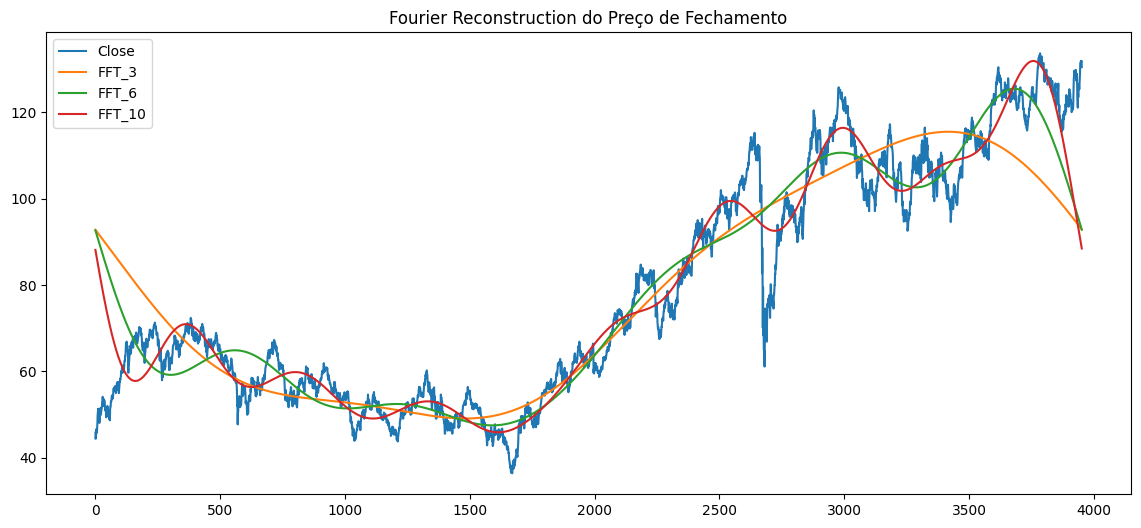

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Série original
close_fft = np.fft.fft(df['Close'].values)
fft_df = pd.DataFrame({'fft': close_fft})

# Função para reconstruir a série com N componentes
def inverse_fft(fft_data, n_components):
    fft_filtered = np.copy(fft_data)
    fft_filtered[n_components:-n_components] = 0
    return np.fft.ifft(fft_filtered).real

# Adicionando reconstruções com diferentes níveis de suavização
for n in [3, 6, 10]:
    df[f'FFT_{n}'] = inverse_fft(close_fft, n)

# Preenchendo qualquer possível NaN com backfill
df.fillna(method='bfill', inplace=True)

# Exemplo de visualização (opcional)
df[['Close', 'FFT_3', 'FFT_6', 'FFT_10']].plot(figsize=(14,6), title='Fourier Reconstruction do Preço de Fechamento')
plt.show()


#ARIMA

In [32]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Série alvo
series = df['Close']

# Espaço de busca simples
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

# Variáveis de controle
best_aic = float('inf')
best_order = None
best_model = None

# Busca em grade
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(series, order=(p, d, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue

print(f"Melhor ordem ARIMA encontrada: {best_order} com AIC = {best_aic:.2f}")

# Previsões in-sample com melhor modelo
arima_pred = best_model.predict(start=best_order[1], end=len(series)-1, typ='levels')

# Criar coluna no DataFrame
df['ARIMA_Pred'] = [np.nan]*best_order[1] + list(arima_pred)
df['ARIMA_Pred'].fillna(method='bfill', inplace=True)


Melhor ordem ARIMA encontrada: (5, 1, 5) com AIC = 12345.97


#Feature engeniring

In [33]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.iloc[:, 1:]

    train_samples = int(X.shape[0] * 0.65)

    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]

    return (X_train, y_train), (X_test, y_test)

In [34]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(df)

In [35]:
pip install xgboost

In [36]:
from xgboost import XGBRegressor

regressor = XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.1)

In [37]:
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

In [38]:
eval_result = regressor.evals_result()

In [39]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

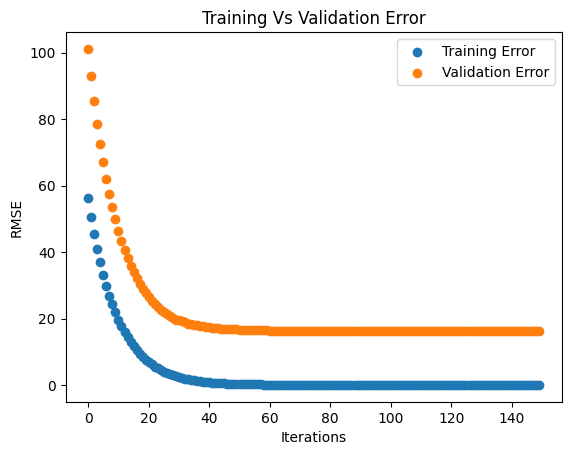

In [40]:
from matplotlib import pyplot as plt
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

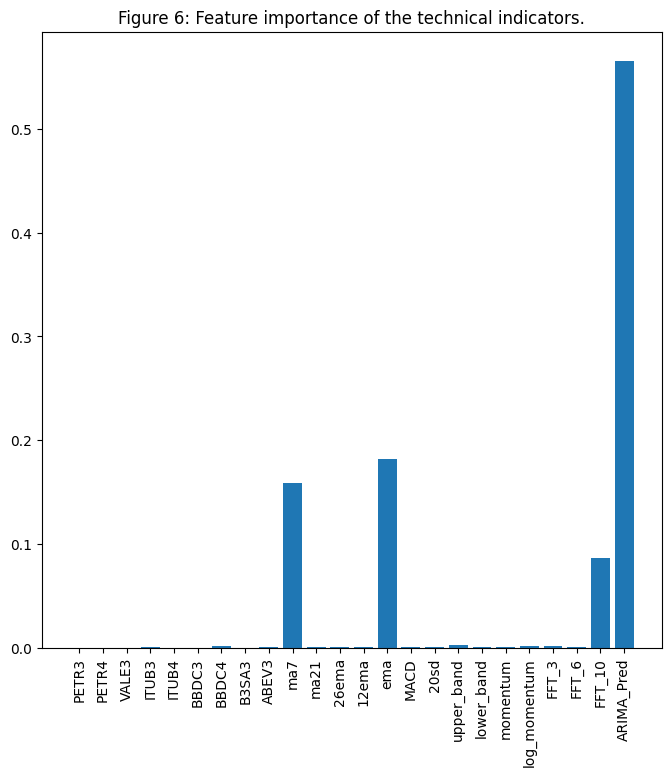

In [41]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

In [42]:
xgbModel.feature_importances_.tolist()

[1.2484862054407131e-05,
 1.9231896658311598e-05,
 2.138062882295344e-05,
 2.77236795227509e-05,
 2.414051596133504e-05,
 2.0588291590684094e-05,
 0.0010620907414704561,
 2.1208257749094628e-05,
 2.8190641387482174e-05,
 0.15823981165885925,
 0.00042557023698464036,
 3.861267396132462e-05,
 4.680337951867841e-05,
 0.18166105449199677,
 9.579602192388847e-05,
 3.037251917703543e-05,
 0.002266091760247946,
 4.712107329396531e-05,
 0.0007786114583723247,
 0.001250515808351338,
 0.0018115295097231865,
 4.5087454054737464e-05,
 0.0863017737865448,
 0.5657241940498352]

In [43]:
X_test_FI.columns

Index(['PETR3', 'PETR4', 'VALE3', 'ITUB3', 'ITUB4', 'BBDC3', 'BBDC4', 'B3SA3',
       'ABEV3', 'ma7', 'ma21', '26ema', '12ema', 'ema', 'MACD', '20sd',
       'upper_band', 'lower_band', 'momentum', 'log_momentum', 'FFT_3',
       'FFT_6', 'FFT_10', 'ARIMA_Pred'],
      dtype='object')

In [44]:
import numpy as np

# Pegando a lista de importâncias
importancias = xgbModel.feature_importances_.tolist()

# Pegando as colunas com importância > 0.01
colunas_importantes = [col for col, imp in zip(X_test_FI.columns, importancias) if imp > 0.01]

# Filtrando o DataFrame com apenas essas colunas
df_inter = df[colunas_importantes]
df_inter

,ma7,ema,FFT_10,ARIMA_Pred
0,45.657143,45.849998,88.123865,45.849993
1,45.657143,45.563998,87.785628,45.849993
2,45.657143,45.449199,87.448094,44.544972
3,45.657143,45.539360,87.111295,44.921880
4,45.657143,45.769487,86.775263,45.816399
...,...,...,...,...
3948,128.962858,128.982098,89.824480,131.455662
3949,129.902858,129.557678,89.483207,131.538175
3950,130.631430,129.972144,89.142477,131.866848
3951,131.277145,130.347716,88.802322,131.682659


In [45]:
df = pd.read_csv("/content/BOVA11.csv")
df = df.drop(columns=['Date', 'Adj Close', 'High', 'Low', 'Open', 'Volume'])
df

,Close
0,45.849998
1,44.419998
2,44.990002
3,45.900002
4,46.689999
...,...
3948,131.649994
3949,131.860001
3950,131.630005
3951,131.850006


In [46]:
import pandas as pd

# Garantindo alinhamento pelo índice
df = pd.concat([df, df_inter], axis=1)
df

,Close,ma7,ema,FFT_10,ARIMA_Pred
0,45.849998,45.657143,45.849998,88.123865,45.849993
1,44.419998,45.657143,45.563998,87.785628,45.849993
2,44.990002,45.657143,45.449199,87.448094,44.544972
3,45.900002,45.657143,45.539360,87.111295,44.921880
4,46.689999,45.657143,45.769487,86.775263,45.816399
...,...,...,...,...,...
3948,131.649994,128.962858,128.982098,89.824480,131.455662
3949,131.860001,129.902858,129.557678,89.483207,131.538175
3950,131.630005,130.631430,129.972144,89.142477,131.866848
3951,131.850006,131.277145,130.347716,88.802322,131.682659


#TF


In [47]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

###Dividir os dados
Você usará uma divisão (70%, 20%, 10%) para os conjuntos de treinamento, validação e teste. Observe que os dados não estão sendo embaralhados aleatoriamente antes da divisão. Isso por dois motivos:

Garante que ainda é possível cortar os dados em janelas de amostras consecutivas.
Garante que os resultados da validação/teste sejam mais realistas, sendo avaliados nos dados coletados após o treinamento do modelo.

In [48]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

###Normalize os dados
É importante dimensionar recursos antes de treinar uma rede neural. A normalização é uma maneira comum de fazer essa escala: subtrair a média e dividir pelo desvio padrão de cada recurso.

A média e o desvio padrão só devem ser calculados usando os dados de treinamento para que os modelos não tenham acesso aos valores nos conjuntos de validação e teste.

In [89]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train_df = scaler.fit_transform(train_df)
val_df = scaler.fit_transform(val_df)
test_df = scaler.fit_transform(test_df)

In [90]:
Colunas = print(df.columns)

Index(['Close', 'ma7', 'ema', 'FFT_10', 'ARIMA_Pred'], dtype='object')


In [91]:
train_df = pd.DataFrame(train_df, columns=['Close', 'ma7', 'ema', 'FFT_10', 'ARIMA_Pred'])
val_df = pd.DataFrame(val_df, columns=['Close', 'ma7', 'ema', 'FFT_10', 'ARIMA_Pred'])
test_df = pd.DataFrame(test_df, columns=['Close', 'ma7', 'ema', 'FFT_10', 'ARIMA_Pred'])

###Janelas de dados
Os modelos neste tutorial farão um conjunto de previsões com base em uma janela de amostras consecutivas dos dados.

As principais características das janelas de entrada são:

- A largura (número de etapas de tempo) das janelas de entrada e rótulo.

- O deslocamento de tempo entre eles.

- Quais recursos são usados ​​como entradas, rótulos ou ambos.

Este tutorial cria uma variedade de modelos (incluindo modelos Linear, DNN, CNN e RNN) e os usa para ambos:

- Previsões de saída única e várias saídas .
- Previsões de um passo de tempo e de vários passos de tempo .


---

Dependendo da tarefa e do tipo de modelo, você pode querer gerar uma variedade de janelas de dados. aqui estão alguns exemplos:

Por exemplo, para fazer uma única previsão 24 horas no futuro, com 24 horas de histórico, você pode definir uma janela como esta:

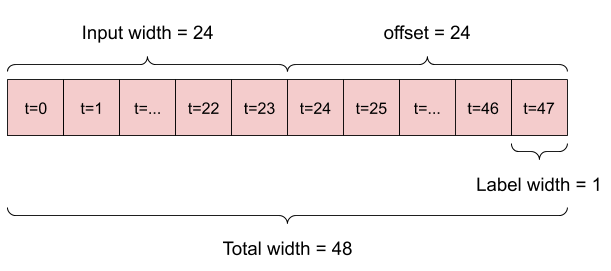

Um modelo que faz uma previsão para uma hora no futuro, com seis horas de histórico, precisaria de uma janela como esta:

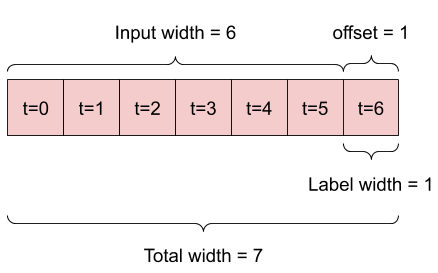

O restante desta seção define uma classe **WindowGenerator** . Esta classe pode:

Manipule os índices e deslocamentos conforme mostrado nos diagramas acima.
Divida janelas de recursos em pares (features, labels) .
Plote o conteúdo das janelas resultantes.
Gere lotes dessas janelas com eficiência a partir dos dados de treinamento, avaliação e teste, usando tf.data.Dataset s.

In [92]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

Aqui está o código para criar as 2 janelas mostradas nos diagramas no início desta seção:

In [93]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Close'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Close']

In [94]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Close'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Close']

###Divisão
Dada uma lista de entradas consecutivas, o método split_window as converterá em uma janela de entradas e uma janela de rótulos.

O exemplo w2 que você definiu anteriormente será dividido assim:



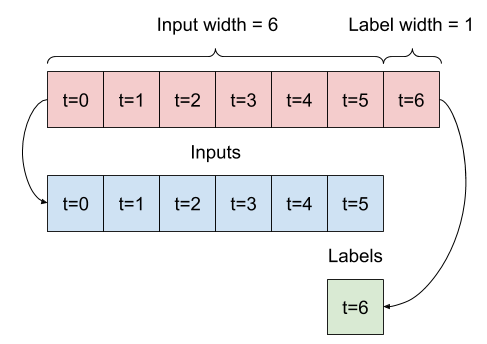

A função split_window é usada para dividir os dados de séries temporais em entradas (inputs) e saídas (targets). Isso é essencial porque modelos de aprendizado profundo precisam aprender padrões a partir de sequências passadas para prever valores futuros.

Motivo para dividir a janela
Séries temporais são compostas por observações ao longo do tempo. Para que uma rede neural consiga prever um valor futuro, precisamos fornecer janelas de dados históricos como entrada. Essa janela precisa ser dividida entre:

Inputs (X): Dados históricos usados para prever.

Targets (Y): Valores futuros que queremos prever.

---
Tipos de previsão possíveis

Dependendo da estratégia usada, podemos dividir a janela de diferentes formas:

- Previsão de um único passo (single-step)

Entrada: [1, 2, 3, 4, 5]

Saída: [6]

O modelo prevê apenas o próximo ponto no tempo.

- Previsão de múltiplos passos (multi-step)

Entrada: [1, 2, 3, 4, 5]

Saída: [6, 7, 8]

O modelo aprende a prever vários valores futuros de uma só vez.

- Autoregressivo

O modelo prevê um valor por vez e usa essa previsão como entrada para prever o próximo.


In [95]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

Este diagrama não mostra o eixo de features dos dados, mas essa função split_window também manipula o label_columns para que possa ser usado para exemplos de saída única e saída múltipla.

In [96]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 5)
Inputs shape: (3, 6, 5)
Labels shape: (3, 1, 1)


###Trama
Aqui está um método de plotagem que permite uma visualização simples da janela dividida:

In [97]:
w2.example = example_inputs, example_labels

In [98]:
def plot(self, model=None, plot_col='Close', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [d]')

WindowGenerator.plot = plot

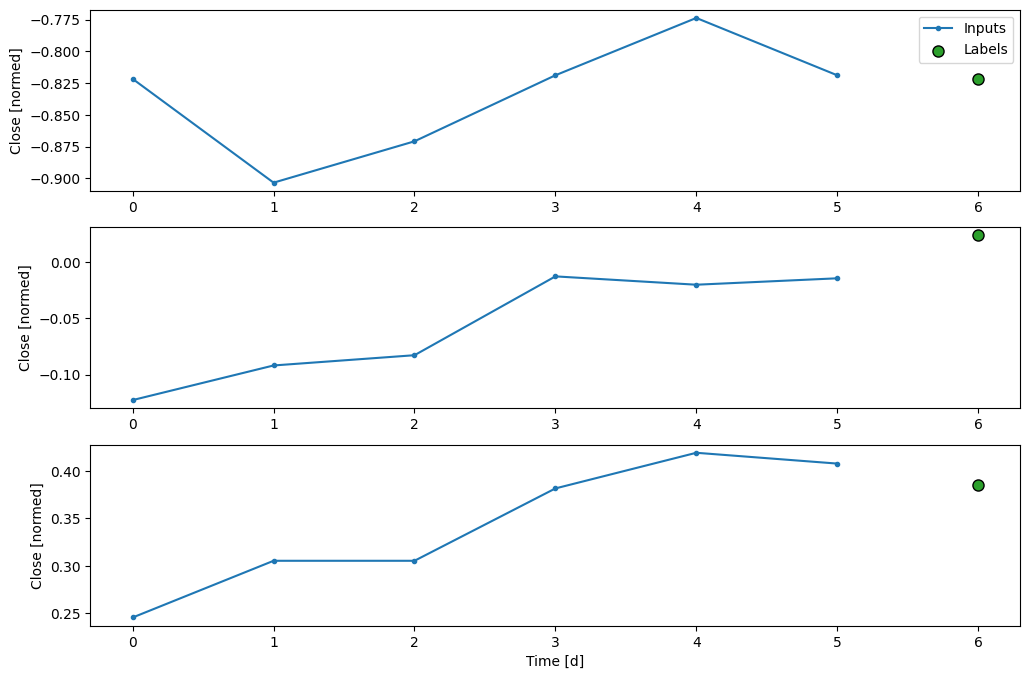

In [99]:
w2.plot()

[link text](https://)###Crie tf.data.Dataset s
Finalmente, este método make_dataset um DataFrame de série temporal e o converterá em um tf.data.Dataset de (input_window, label_window) usando a função tf.keras.utils.timeseries_dataset_from_array :

In [100]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

O objeto WindowGenerator contém dados de treinamento, validação e teste.

Adicione propriedades para acessá-los como tf.data.Dataset s usando o método make_dataset definido anteriormente. Além disso, adicione um lote de exemplo padrão para fácil acesso e plotagem:

In [101]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Agora, o objeto WindowGenerator fornece acesso aos objetos tf.data.Dataset , para que você possa iterar facilmente sobre os dados.

A propriedade Dataset.element_spec informa a estrutura, os tipos de dados e as formas dos elementos do conjunto de dados.

In [102]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 5), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

O modelo mais simples que pode ser construído com esse tipo de dado é aquele que prevê o valor de um único recurso — vários passos à frente (no caso, 5 dias) no futuro, com base apenas nas condições do dia anterior.

Assim, começa-se construindo modelos para prever o valor de close do ativo IBOV11 5 dias à frente, utilizando apenas as informações do dia anterior.



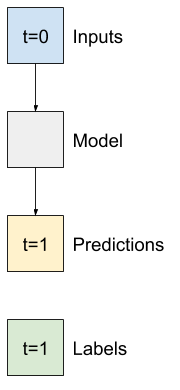

O objeto window cria tf.data.Dataset s a partir dos conjuntos de treinamento, validação e teste, permitindo iterar facilmente em lotes de dados.

Essa frase significa que o objeto window é usado para transformar os conjuntos de treinamento, validação e teste em um formato eficiente para treinar um modelo de aprendizado profundo com TensorFlow. Ele faz isso convertendo os dados em um tf.data.Dataset, que é uma estrutura otimizada para lidar com grandes volumes de dados e processamento eficiente.


Na prática joga os dados para array e melhor interpretabilidade sobre no modelo

Antes de construir um modelo treinável, é recomendável ter uma linha de base de desempenho como ponto de comparação com modelos posteriores mais complicados.

A primeira tarefa é prever o valor de close uma hora no futuro, dado o valor atual de todos os recursos. Os valores atuais incluem o close atual.

Assim, começa-se com um modelo que apenas retorne o close atual como a previsão, prevendo "Sem alteração". Essa é uma linha de base razoável, pois os preços de ações ou ativos financeiros mudam lentamente, especialmente em intervalos curtos. Obviamente, essa linha de base terá um desempenho inferior se a previsão for feita para um período mais distante.

Explicação do exemplo de linha de base: O objetivo é prever o valor de close uma hora no futuro, usando os valores atuais de todas as variáveis disponíveis.

Linha de base utilizada: O modelo de linha de base simplesmente assume que o close no futuro será igual ao close atual. Esse modelo básico pode ser chamado de "Sem alteração", pois replica o último valor conhecido, sem considerar padrões ou tendências.

Por que essa abordagem faz sentido?

Os preços financeiros mudam lentamente: Em muitos cenários, o valor de close de um ativo não muda drasticamente de uma hora para outra.

Fácil de calcular: A previsão é simples e direta, sem necessidade de treinar um modelo sofisticado.

Boa referência inicial: Se um modelo mais complexo não for significativamente melhor que essa abordagem, talvez ele não seja útil.

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0956


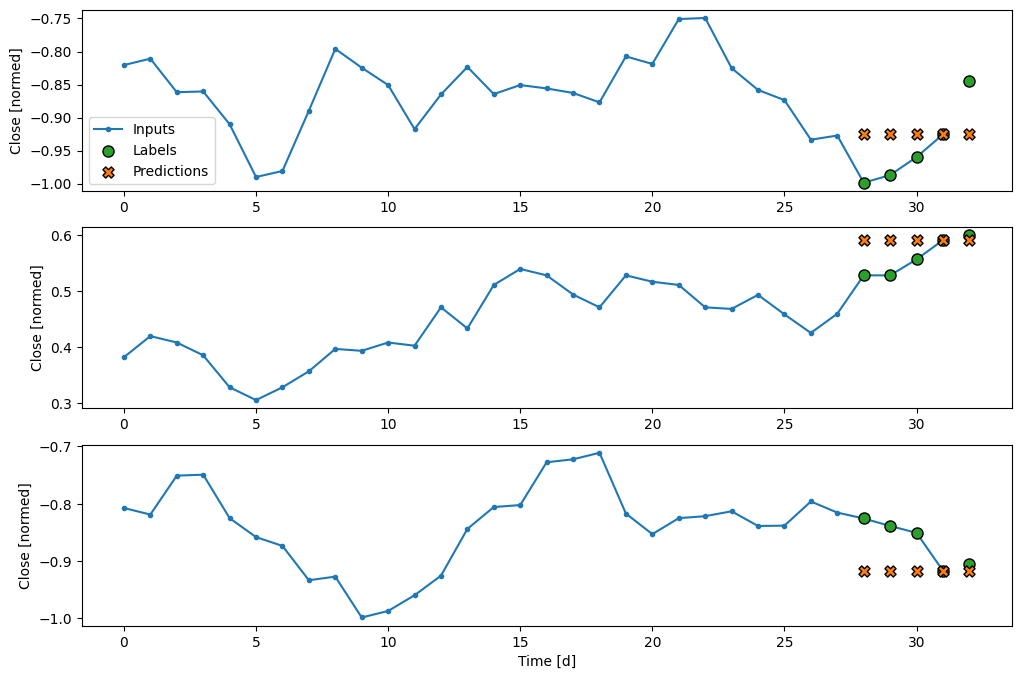

In [103]:
# --------------------------------------
# 1. RECRIAÇÃO DO WIDE_WINDOW
# --------------------------------------
wide_window = WindowGenerator(
    input_width=32,
    label_width=5,
    shift=1,
    label_columns=['Close']
)

# --------------------------------------
# 2. ÍNDICE DA COLUNA 'Close'
# --------------------------------------
column_indices = {name: i for i, name in enumerate(wide_window.train.element_spec[0].shape[-1] * [''])}
column_indices['Close'] = 0  # força para univariado se necessário

# --------------------------------------
# 3. BASELINE QUE PREVÊ A ÚLTIMA OBSERVAÇÃO
#     Repete o último valor de entrada 'Close' para todos os 5 dias futuros.
# --------------------------------------
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        # pega a última observação de 'Close'
        result = inputs[:, -1, self.label_index]
        # repete essa observação 5 vezes (para cada passo futuro)
        return tf.repeat(result[:, tf.newaxis, tf.newaxis], repeats=5, axis=1)

# --------------------------------------
# 4. INSTANCIAR, COMPILAR E AVALIAR
# --------------------------------------
baseline = Baseline(label_index=column_indices['Close'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

# --------------------------------------
# 5. PLOT
# --------------------------------------
wide_window.plot(baseline)


Isso imprimiu algumas métricas de desempenho, mas elas não dão uma ideia de quão bem o modelo está se saindo.

O WindowGenerator tem um método de plotagem, mas os plots não serão muito interessantes com apenas uma amostra.

Portanto, crie um WindowGenerator mais amplo que gere janelas 24 horas de entradas e rótulos consecutivos por vez. A nova variável wide_window não altera a maneira como o modelo opera. O modelo ainda faz previsões uma hora no futuro com base em uma única etapa de tempo de entrada. Aqui, o eixo do time funciona como o eixo do batch : cada previsão é feita de forma independente, sem interação entre as etapas de tempo:

Essa janela expandida pode ser passada diretamente para o mesmo modelo de baseline de base sem nenhuma alteração de código. Isso é possível porque as entradas e os rótulos têm o mesmo número de passos de tempo e a linha de base apenas encaminha a entrada para a saída:

---
Como o que a baseline fazia era apenas deslocar a amostra passada para frente, vamos ao invéz de passar uma entrada passar uma jenala expandida.



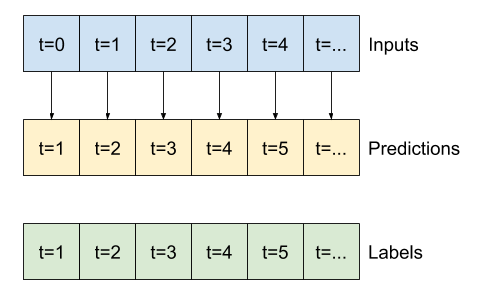

#Compile

Este tutorial treina muitos modelos, portanto, empacote o procedimento de treinamento em uma função:

In [104]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

#CNNs - Rede neural de convolução

---

Analysis and Forecasting of Financial Time Series Using CNN and LSTM-Based Deep Learning Models


 CNN model (CNN#3)


---


Uma camada de convolução ( tf.keras.layers.Conv1D ) também usa várias etapas de tempo como entrada para cada previsão.

Abaixo está o mesmo modelo de multi_step_dense , reescrito com uma convolução.

Observe as mudanças:

O tf.keras.layers.Flatten e o primeiro tf.keras.layers.Dense são substituídos por um tf.keras.layers.Conv1D .
O tf.keras.layers.Reshape não é mais necessário, pois a convolução mantém o eixo do tempo em sua saída.

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3118 - mae: 0.3204 - val_loss: 0.0519 - val_mae: 0.1797
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0124 - mae: 0.0723 - val_loss: 0.0287 - val_mae: 0.1316
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0067 - mae: 0.0574 - val_loss: 0.0193 - val_mae: 0.1068
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mae: 0.0437 - val_loss: 0.0155 - val_mae: 0.0955
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0035 - mae: 0.0422 - val_loss: 0.0139 - val_mae: 0.0908
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0029 - mae: 0.0379 - val_loss: 0.0131 - val_mae: 0.0871
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0026 - mae: 0.0362 - val_loss: 0.0120 - val_mae: 0.0830
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0028 - mae: 0.0371 - val_loss: 0.0113 - val_mae: 0.0805
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.002

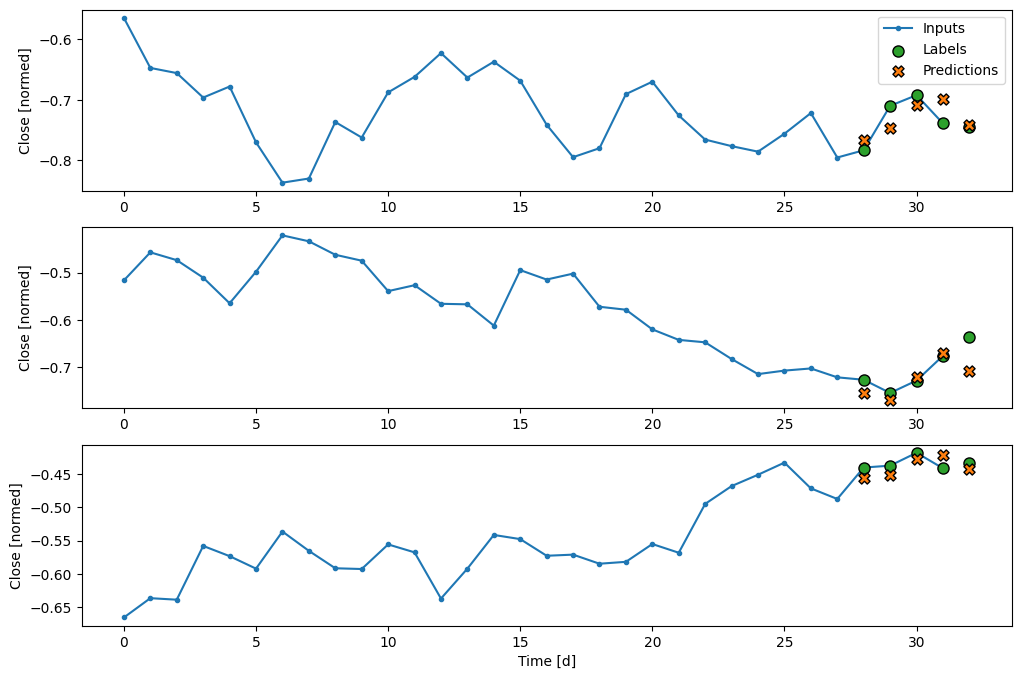

In [105]:
import tensorflow as tf
import matplotlib.pyplot as plt

# --------------------------------------
# 1. GERADOR DE JANELAS
# --------------------------------------
wide_conv_window = WindowGenerator(
    input_width=32,
    label_width=5,
    shift=1,
    label_columns=['Close']
)

# --------------------------------------
# 2. PARÂMETROS DINÂMICOS
# --------------------------------------
sequence_length = wide_conv_window.example[0].shape[1]
num_features = wide_conv_window.example[0].shape[2]

# --------------------------------------
# 3. MODELO CNN (com TimeDistributed)
# --------------------------------------
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(sequence_length, num_features)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(5),  # 5 passos futuros
    tf.keras.layers.Reshape((5, 1))  # Saída compatível com TimeDistributed(Dense(1))
])

# --------------------------------------
# 4. FUNÇÃO DE COMPILAÇÃO E TREINAMENTO
# --------------------------------------
def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae'])

    history = model.fit(window.train,
                        epochs=20,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

# --------------------------------------
# 5. TREINAMENTO
# --------------------------------------
history = compile_and_fit(cnn_model, wide_conv_window)

# --------------------------------------
# 6. AVALIAÇÃO
# --------------------------------------

val_performance['CNN'] = cnn_model.evaluate(wide_conv_window.val)
performance['CNN'] = cnn_model.evaluate(wide_conv_window.test, verbose=0)

# --------------------------------------
# 7. VISUALIZAÇÃO
# --------------------------------------
wide_conv_window.plot(cnn_model)


A diferença entre este conv_model e o modelo multi_step_dense é que o conv_model pode ser executado em entradas de qualquer tamanho. A camada convolucional é aplicada a uma janela deslizante de entradas

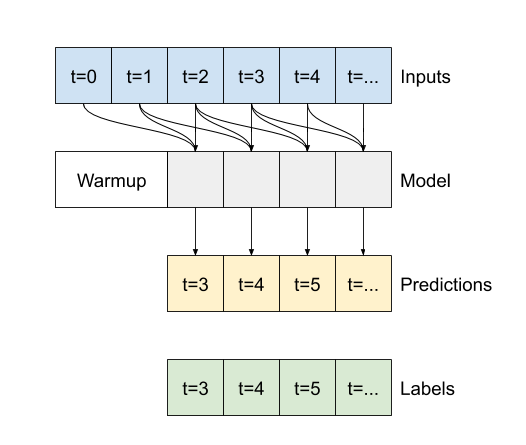

#RNNs - Rede neural recorrente
Uma Rede Neural Recorrente (RNN) é um tipo de rede neural adequada para dados de séries temporais. As RNNs processam uma série temporal passo a passo, mantendo um estado interno de passo a passo.

Mais informações sobre a geração de texto com RNNs podem ser encontradas em tutoriais específicos e no guia Redes neurais recorrentes (RNN) com Keras.

Este tutorial utiliza uma camada RNN chamada Long Short-Term Memory (tf.keras.layers.LSTM).

Um argumento construtor importante para todas as camadas Keras RNN, como tf.keras.layers.LSTM, é o argumento return_sequences. Essa configuração pode ser ajustada de duas maneiras:

Se False (o padrão), a camada retorna apenas a saída do passo de tempo final, permitindo que o modelo aqueça seu estado interno antes de fazer uma única previsão.


---

return_sequences = false = rnn = desafios ao lidar com dependências de longo prazo

---



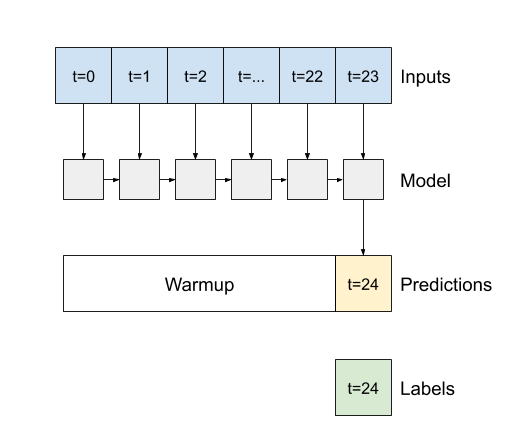

Se True , a camada retorna uma saída para cada entrada. Isso é útil para:
Empilhamento de camadas RNN.
Treinar um modelo em várias etapas de tempo simultaneamente.

---

return_sequences = true = lstm = memoria

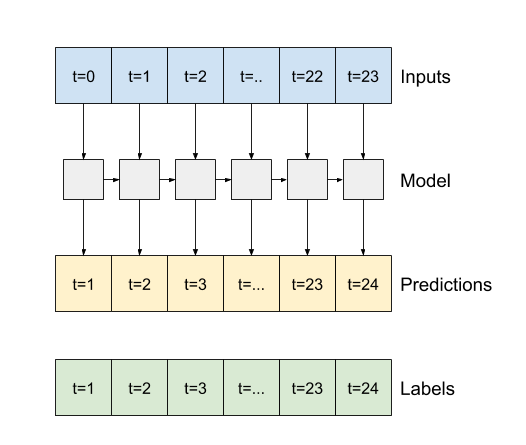

##LSTM



---

Artigo: Stock Price Prediction Using Machine Learning and LSTM-Based Deep Learning Models

---

Uma RNN se torna uma LSTM (Long Short-Term Memory) ao incorporar uma estrutura de unidades chamadas "células", que ajudam a controlar o fluxo de informações através de "portas". Essas portas incluem a "porta de entrada", "porta de esquecimento" e "porta de saída", que permitem que a LSTM memorize ou esqueça informações importantes ao longo do tempo. Esse mecanismo resolve o problema do desvanecimento e explosão de gradientes, permitindo que a LSTM mantenha dependências de longo prazo nas sequências.

o problema de desvanecimento e explosão de gradientes pode ser mitigado com o uso de otimizadores adequados. Em Python, otimizadores como o Adam e RMSprop são frequentemente usados com LSTMs.

---



24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0076 - mae: 0.0641


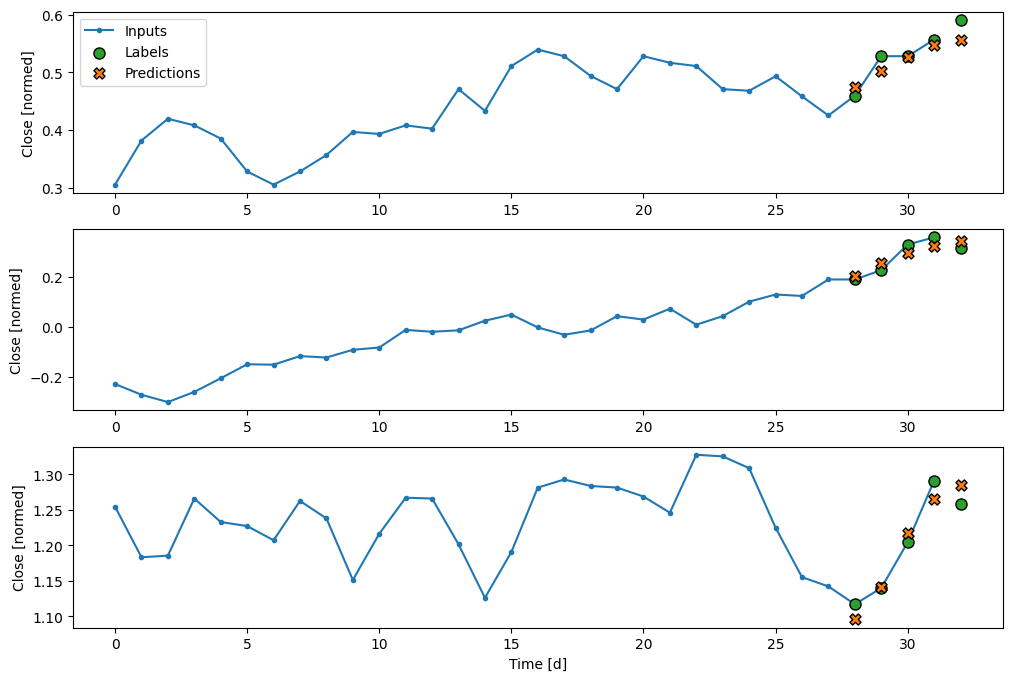

In [106]:
wide_window = WindowGenerator(
    input_width=32, label_width=5, shift=1,
    label_columns=['Close'])


# Supondo que:
# sequence_length = 10  (input_length no artigo)
# output_length = 5     (para 5 dias no futuro)
# num_features = 1      (univariado, apenas a coluna 'Open')

sequence_length = wide_conv_window.example[0].shape[1]
num_features = wide_conv_window.example[0].shape[2]

lstm_model = tf.keras.models.Sequential([
    # Encoder LSTM
    tf.keras.layers.LSTM(200, activation='relu', input_shape=(sequence_length, num_features)),

    # Repete o vetor para cada passo no futuro (5 dias)
    tf.keras.layers.RepeatVector(5),  # output_length

    # Decoder LSTM
    tf.keras.layers.LSTM(200, activation='relu', return_sequences=True),

    # Interpretação de cada passo previsto
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation='relu')),

    # Saída final univariada
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

wide_window.plot(lstm_model)


#Desempenho
Com esse conjunto de dados, normalmente cada um dos modelos se sai um pouco melhor do que o anterior:

In [107]:
print(performance.values())
print(val_performance.values())

dict_values([[0.0582842156291008, 0.1630859524011612], [0.03076867014169693, 0.1266365945339203], [0.026962123811244965, 0.12272081524133682]])
dict_values([[0.018805237486958504, 0.09505710005760193], [0.008036286570131779, 0.06679529696702957], [0.0071221874095499516, 0.06335792690515518]])


In [108]:
print(lstm_model.metrics_names)

['loss', 'compile_metrics']


In [109]:
for v in performance.values():
    print(len(v), v)

2 [0.0582842156291008, 0.1630859524011612]
2 [0.03076867014169693, 0.1266365945339203]
2 [0.026962123811244965, 0.12272081524133682]


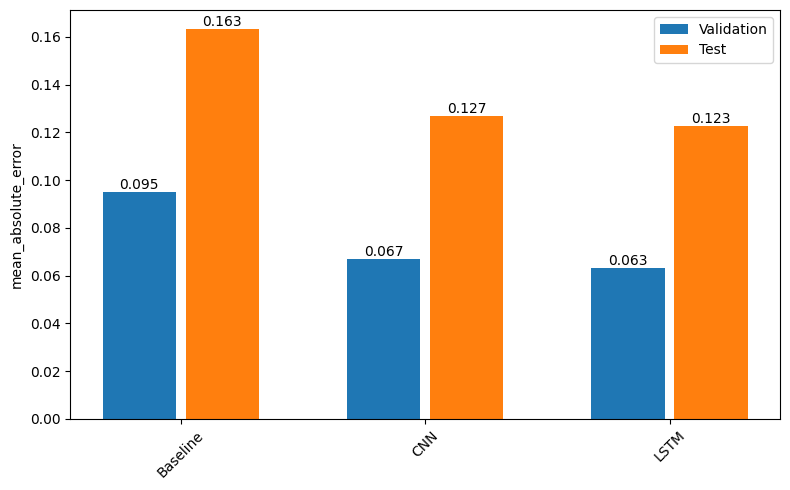

In [110]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'

# Pega o índice correto da métrica
metric_index = lstm_model.metrics_names.index("compile_metrics")

# Extrai os valores da métrica
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

# Cria o gráfico de barras
plt.figure(figsize=(8, 5))
plt.ylabel(metric_name)
bars1 = plt.bar(x - 0.17, val_mae, width, label='Validation')
bars2 = plt.bar(x + 0.17, test_mae, width, label='Test')

# Adiciona os valores no topo das barras
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.3f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.3f}', ha='center', va='bottom')

plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [111]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.1631
CNN         : 0.1266
LSTM        : 0.1227
